### Basic visualization example, decision trees


In [15]:
# imports etc
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# pip install dtreeviz
import dtreeviz

In [16]:
# Create study hours / attendance dataset
# this is a numeric version of the data
# NOTE: decision tree visualizers can't handle text categories
# which means our data has to be in the typical X/y -format
# => only numeric values are accepted
rows = [
    ["yes", 2, 95],  
    ["yes", 15, 40], 
    ["no", 3, 30],  
    ["yes", 7, 80], 
    ["yes", 12, 60], 
    ["no", 4, 70],  
    ["yes", 8, 73],  
    ["yes", 11, 55], 
    ["no", 5, 25],   
    ["yes", 9, 80], 
    ["no", 6, 65],  
    ["yes", 14, 50],
    ["no", 7, 20],  
    ["yes", 13, 75], 
    ["no", 1, 10], 
    ["yes", 16, 100]
]

# column names
column_names = ["Pass Exam", "Study Hours", "Attendance%"]

# create a DataFrame
df = pd.DataFrame(columns=column_names, data=rows)

# y-variable to integer
df['Pass Exam'] = df['Pass Exam'].replace({"yes": 1, "no": 0})
df

C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_17372\2919212185.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


,Pass Exam,Study Hours,Attendance%
0,1,2,95
1,1,15,40
2,0,3,30
3,1,7,80
4,1,12,60
5,0,4,70
6,1,8,73
7,1,11,55
8,0,5,25
9,1,9,80


### Let's make a very quick Decision Tree with scikit-learn

In [ ]:
# as ni most ML algorithms, split data to X and y (support variables + target variable)
X = df.drop("Pass Exam", axis=1)
y = df['Pass Exam']

### NOTE! If you only wish to visualize your data with a decision tree, X and y is enough

**However, if you wish to use decision tree as the ACTUAL machine learning algorithm => train/test-split is needed**

In [18]:
# create a decision tree classifier for the visualization
# and train the model with the data
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

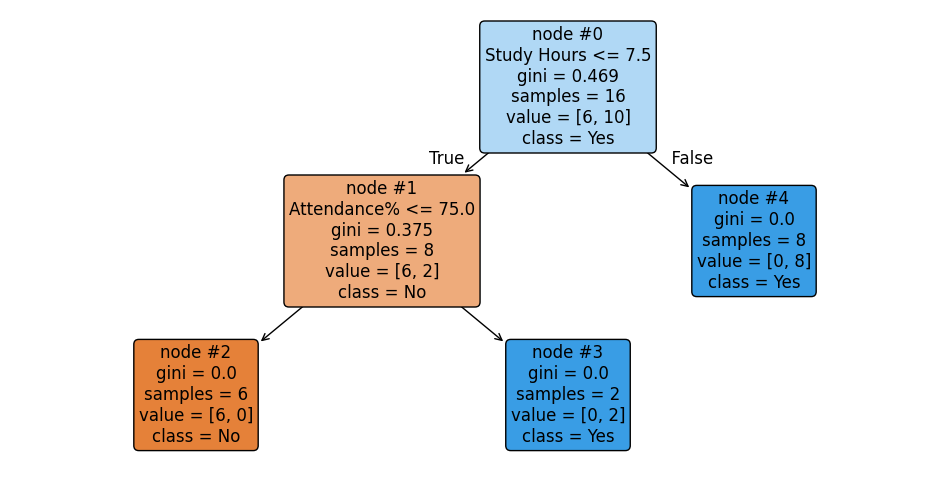

In [19]:
from sklearn.tree import export_graphviz
import subprocess
from sklearn import tree

# Export the decision tree to DOT format
export_graphviz(clf, 
                   feature_names=X.columns,  
                   class_names=["No", "Yes"],
                   filled=True, rounded=True, node_ids=True, out_file='tree.dot')



# adjust figsize for a different size
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(clf, 
                  feature_names=X.columns,  
                  class_names=["No", "Yes"],
                  filled=True, rounded=True, fontsize=12, node_ids=True
                  )

c:\Users\tuomas.valtanen\introtoml2026lectures\IntroductionToML2026\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


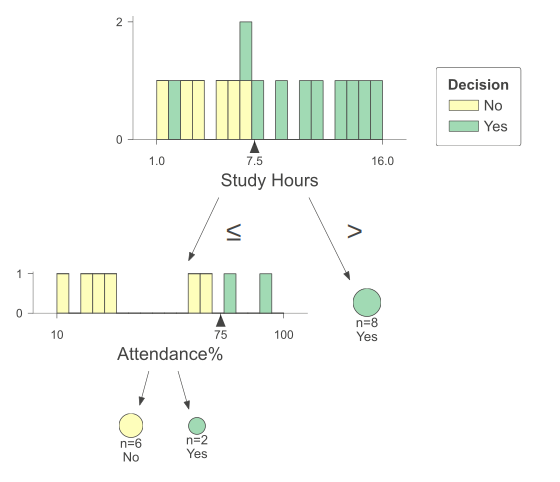

In [20]:
# pip install dtreeviz
import dtreeviz
viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='Decision',
                           class_names=["No", "Yes"])

# for viewing in the Jupyter notebook
# Note: this is not practical with large 
# decision trees!
# adjust the scale if you need a bigger picture (for example 2.5)
viz_model.view(scale=2.0)